In [1]:
#put together each unit to create a complete pipeline 

In [6]:
# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.to(device)

Using cache found in C:\Users\jacob/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-6-8 Python-3.12.3 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [ ]:
#current model

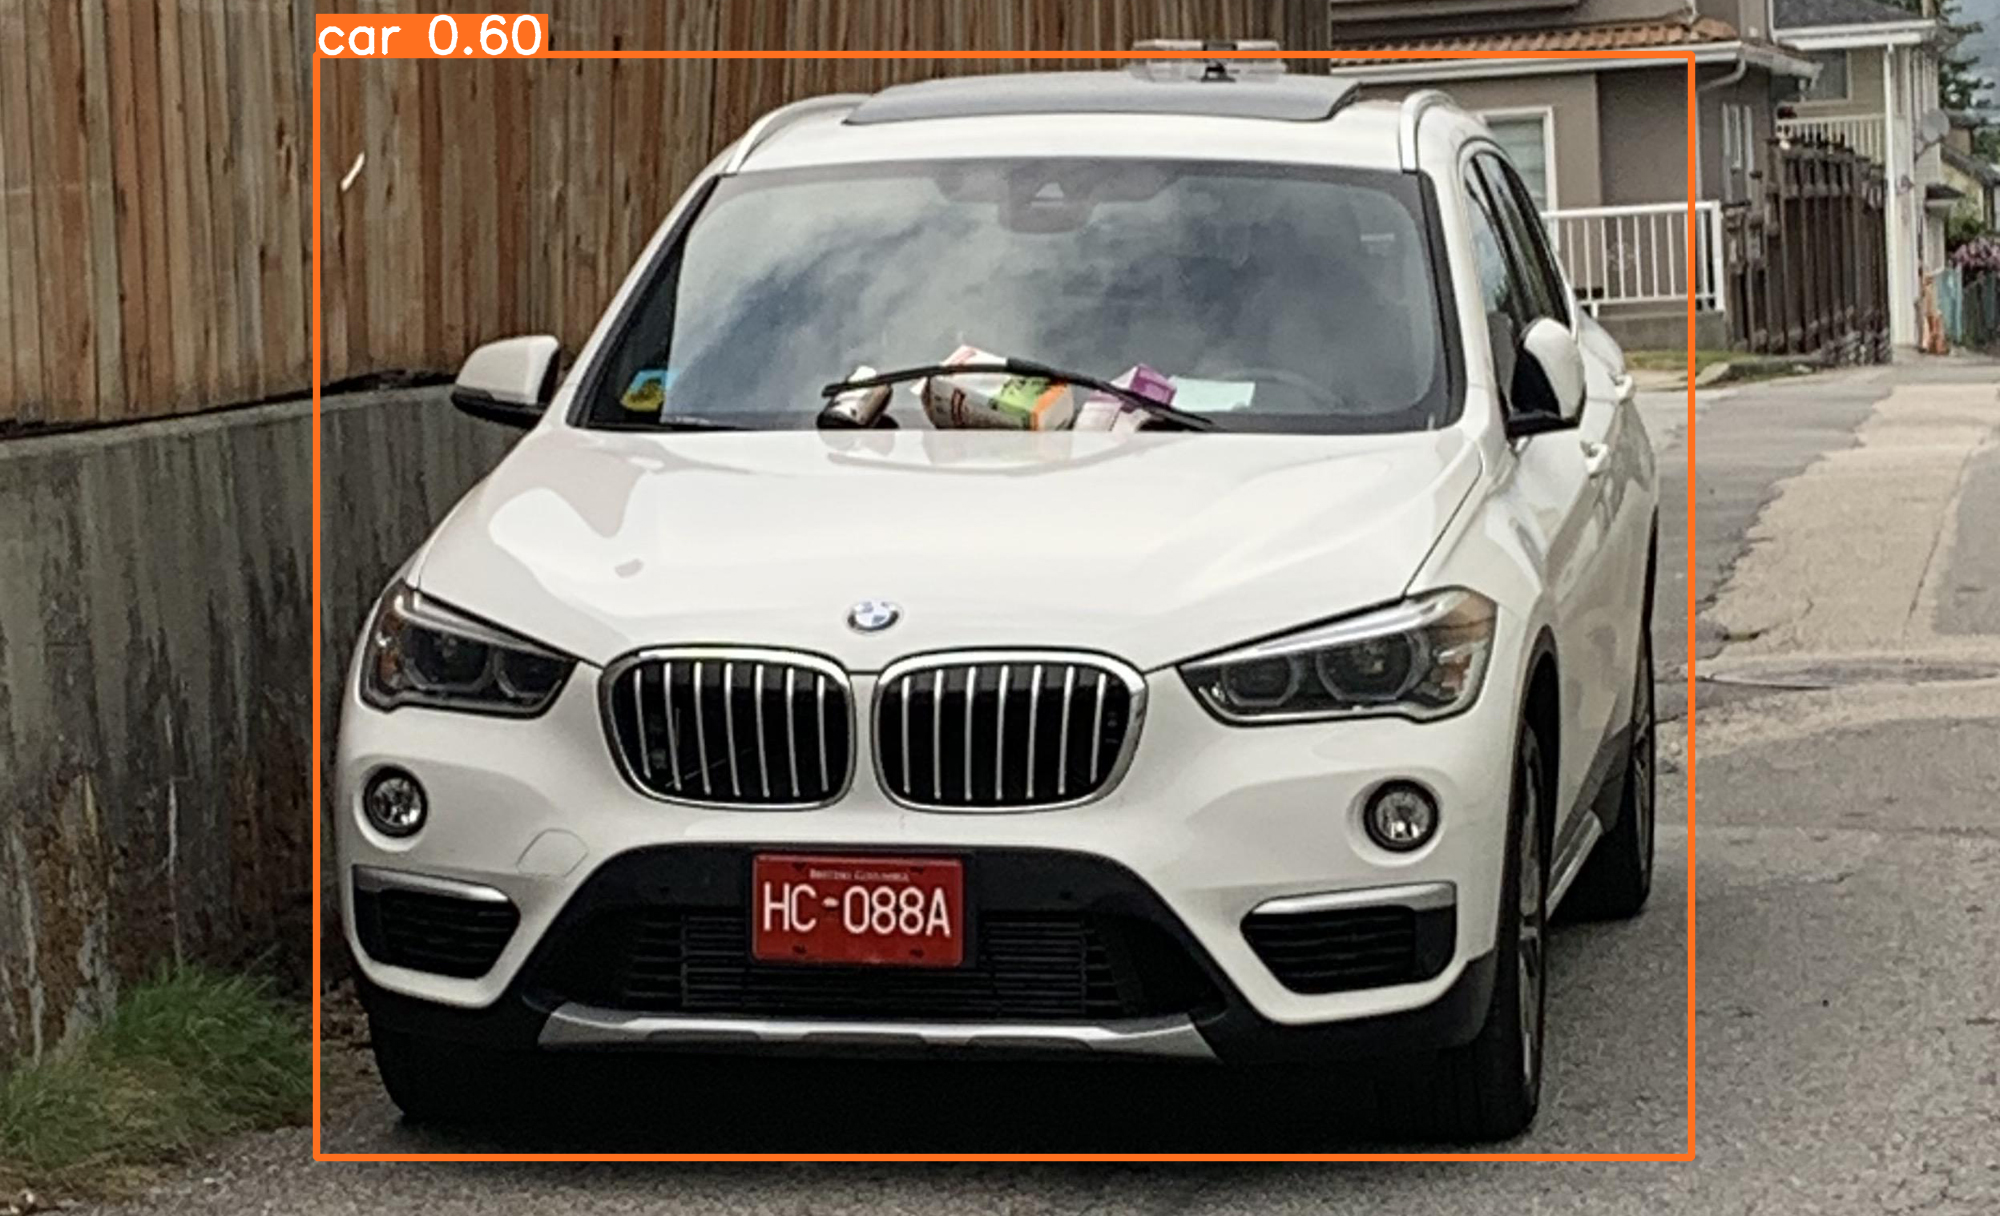

In [8]:
#results.show()

In [70]:
# Imports
import torch
from PIL import Image
import os
import tempfile
import cv2
import subprocess
import re
import numpy as np
import io
import matplotlib.pyplot as plt

In [63]:
def run_alpr(image_path):
    command = [
        'alpr',
        '-c', 'us',
        '--topn', '1',
        image_path
    ]
    try:
        result = subprocess.run(command, capture_output=True, text=True, check=True)
        return result.stdout
    except subprocess.CalledProcessError as e:
        print(f"Error running alpr on {image_path}: {e}")
        return None

def process_image(image_path):
    #print(f"Processing image: {image_path}")
    alpr_output = run_alpr(image_path)
    if alpr_output:
        #print("ALPR Output:")
        return alpr_output
    else:
        print("No output from ALPR.")

In [78]:
# def run_alpr_V2(image_data):
#     command = [
#         'alpr',
#         '-c', 'us',
#         '--topn', '1',
#         '-'
#     ]
#     try:
#         result = subprocess.run(command, input=image_data, capture_output=True, text=True, check=True)
#         return result.stdout
#     except subprocess.CalledProcessError as e:
#         print(f"Error running alpr: {e}")
#         return None


# def run_alpr_V2(image_data):
#     command = [
#         'alpr',
#         '-c', 'us',
#         '--topn', '1',
#         '-'
#     ]
#     try:
#         # Convert image_data to bytes if it's not already
#         if isinstance(image_data, np.ndarray):
#             image_data = image_data.tobytes()
        
#         result = subprocess.run(command, input=image_data, capture_output=True, check=True)
#         return result.stdout.decode('utf-8')  # Decode stdout to string assuming it's UTF-8
#     except subprocess.CalledProcessError as e:
#         print(f"Error running alpr: {e}")
#         return None


def run_alpr_V3(image_data):
    try:
        # Create a temporary file to store the image data
        with tempfile.NamedTemporaryFile(suffix='.jpg', delete=False) as temp_img_file:
            temp_img_file.write(image_data)
            temp_img_path = temp_img_file.name
        
        command = [
            'alpr',
            '-c', 'us',
            '--topn', '1',
            temp_img_path  # Use the temporary file path here
        ]
        
        result = subprocess.run(command, capture_output=True, text=True, check=True)
        return result.stdout
    except subprocess.CalledProcessError as e:
        print(f"Error running alpr: {e}")
        return None
    finally:
        try:
            # Remove the temporary file after use
            if temp_img_path:
                os.remove(temp_img_path)
        except Exception as e:
            print(f"Error cleaning up temp file: {e}")

def process_image_V3(image_path):
    #print(f"Processing image: {image_path}")
    alpr_output = run_alpr_V3(image_path)
    if alpr_output:
        #print("ALPR Output:")
        return alpr_output
    else:
        print("No output from ALPR.")

In [ ]:
def read_image_as_bytes(image_path):
    with open(image_path, 'rb') as f:
        image_bytes = f.read()
    return image_bytes

In [ ]:
# def read_image_as_bytes_V2(image): #Old version
#     with io.BytesIO() as output:
#         image.save(output, format='JPEG')  # Adjust format as needed ('JPEG', 'PNG', etc.)
#         image_bytes = output.getvalue()
#     return image_bytes

In [ ]:
def read_image_as_bytes_V2(image):
    if image is None:
        # Create a blank image with a specified size and color (e.g., white)
        blank_image = Image.new('RGB', (100, 100), color = 'white')
        image = blank_image

    with io.BytesIO() as output:
        image.save(output, format='JPEG')  # Adjust format as needed ('JPEG', 'PNG', etc.)
        image_bytes = output.getvalue()
    return image_bytes

In [31]:
def Yolov5_Detection(img):

    results = model(img) #Full image
    #results.show()
    
    boxes = results.xyxy[0]  # Get the bounding box coordinates for the image
    for result in boxes: 
        x1, y1, x2, y2, conf, cls = result  # Bounding box coordinates, confidence, and class index
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        label = results.names[int(cls)]  # Get the class name using the class index
        confidence = conf.item() #Get confidence

        cropped_image = img.crop((x1, y1, x2, y2))
        
       # return 

        print(confidence)
        print(label)

In [45]:
def Yolov5_Detection_V2(img):

    results = model(img) #Full image

    img = Image.open(img)

    boxes = results.xyxy[0]  # Get the bounding box coordinates for the image
    for result in boxes: 

        x1, y1, x2, y2, conf, cls = result  # Bounding box coordinates, confidence, and class index
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
    
        label = results.names[int(cls)]  # Get the class name using the class index
        confidence = conf.item() #Get confidence
        cropped_image = img.crop((x1, y1, x2, y2)) #get cropped image
        
    return  results, cropped_image, confidence, label


In [265]:
def Yolov5_Detection_V3(img):

    results = model(img) #Full image

    #Makes more sense: Dont want to be passing in location of image each time rather just the image!
    if not isinstance(img, Image.Image):
        img = Image.fromarray(img)  # Assuming img is a numpy array or similar format

    #if isinstance(img, Image.Image):
        #img = Image.open(img) #Or error

    # Initialize variables
    cropped_image = None
    confidence = None
    label = None

    boxes = results.xyxy[0]  # Get the bounding box coordinates for the image
    for result in boxes: 

        x1, y1, x2, y2, conf, cls = result  # Bounding box coordinates, confidence, and class index
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        bounding_box_cs = [x1, y1, x2, y2] #NEW
    
        label = results.names[int(cls)]  # Get the class name using the class index
        confidence = conf.item() #Get confidence
        cropped_image = img.crop((x1, y1, x2, y2)) #get cropped image
        
    return  results, cropped_image, confidence, label

In [39]:
def extract_frames(video_path):
    # List to store frames
    frames = []
    
    # Load the video
    video = cv2.VideoCapture(video_path)
    success, frame = video.read()

    # Read until the end of the video
    while success:
        # Append the frame to the list
        frames.append(frame)
        # Read the next frame
        success, frame = video.read()
    
    # Release the video object
    video.release()

    return frames

In [ ]:
def Driver(feed): #
    #feed = 'C:\\Users\\jacob\\Desktop\\Projects\\ANPR_Camera\\TEST_PHOTOS\\TEST1.jpg'
    #feed = Image
    yolo_det = Yolov5_Detection_V2(feed) #Takes a frame from feed

    with tempfile.TemporaryDirectory() as temp_dir:

        cropped_image = yolo_det[1] #Only grab the inner bounding box

        # Save the cropped image to a temporary file
        cropped_image_path = os.path.join(temp_dir, f'cropped_image_{i}.jpg')
        cropped_image.save(cropped_image_path)
    
        #OpenALPR to read license plate
        OpenALPR = process_image(cropped_image_path)
        OpenALPR = extract_plate_info(OpenALPR)

    return yolo_det, OpenALPR

In [115]:
def Driver_V2(feed): #
    #feed = 'C:\\Users\\jacob\\Desktop\\Projects\\ANPR_Camera\\TEST_PHOTOS\\TEST1.jpg'
    #feed = Image
    yolo_det = Yolov5_Detection_V3(feed) #Takes a frame from feed

    cropped_image = yolo_det[1] #Only grab the inner bounding box

    #OpenALPR to read license plate
    OpenALPR = process_image_V3(read_image_as_bytes_V2(cropped_image))
    #OpenALPR = extract_plate_info(OpenALPR) #Create this function later and ensure it matches all possible outputs

    return yolo_det, OpenALPR

In [ ]:
def extract_plate_info(output_str):
    if "No license plates found." in output_str:
        return ["", 0.0]
    
    # Split the output string by lines
    lines = output_str.strip().split('\n')
    
    # Extract the license plate and confidence from the first line
    plate_info_line = lines[1].strip()
    
    # Extract plate number and confidence
    plate_number = plate_info_line.split('- ')[-1].split('\t')[0].strip()
    confidence_str = plate_info_line.split('confidence: ')[-1].strip()
    confidence = float(confidence_str[:-1])  # Remove the trailing '\n' and convert to float
    
    return [plate_number, round(confidence, 1)]

In [ ]:
def most_common_license_plate_V2(lst):
    # Extract the license plates (first element) from each inner list, excluding empty strings
    license_plates = [sublist[0] for sublist in lst if sublist[0]]
    
    # Count occurrences of each license plate
    counts = Counter(license_plates)
    
    # Get the most common license plate and its count
    most_common = counts.most_common(1)
    
    # Check if there is at least one non-empty license plate
    if most_common:
        most_common_license_plate = most_common[0][0]
    else:
        most_common_license_plate = None  # or you can handle it differently if needed
    
    return most_common_license_plate

In [ ]:
def yolov5_results_to_numpy(results):
    # Show the results using Matplotlib
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(np.squeeze(results.render()[0]))
    ax.axis('off')  # Hide axes
    plt.tight_layout()

    # Convert the Matplotlib figure to a NumPy array
    fig.canvas.draw()
    image_np = np.array(fig.canvas.renderer._renderer)
    plt.close(fig)  # Close the Matplotlib figure to free memory

    return image_np

In [ ]:
def display_numpy_image(image_np):
    # Convert NumPy array to PIL Image
    image_pil = Image.fromarray(image_np)

    # Display the PIL Image in Jupyter Notebook
    display(image_pil)

In [ ]:
def create_video(images, output_video_path, fps=24):
    # Determine the shape of the images (assuming all have the same shape)
    height, width, _ = images[0].shape

    # Initialize VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    # Write each frame to the video
    for image in images:
        # Convert RGB to BGR (OpenCV uses BGR)
        frame_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        out.write(frame_bgr)

    # Release the VideoWriter and close all OpenCV windows
    out.release()
    cv2.destroyAllWindows()

In [84]:
#results, cropped_image, confidence, label = Yolov5_Detection_V3('C:\\Users\\jacob\\Desktop\\Projects\\ANPR_Camera\\TEST_PHOTOS\\TEST1.jpg')

In [85]:
#process_image('C:\\Users\\jacob\\Desktop\\Projects\\ANPR_Camera\\TEST_PHOTOS\\TEST1.jpg')

In [274]:
video_path = "C:\\Users\\jacob\\Desktop\\Projects\\ANPR_Camera\\Data\\DSCN1162.mp4"

frames = extract_frames(vid)
img = frame[1]

In [276]:
type(img)

numpy.ndarray

In [255]:
#Test frame by frame too slow otherwise
yolo_lst = []
alpr_lst = []

total = len(frames)
count = 1
for image in frames: 

    #Can run tranformations on outputs
    yolo, alpr = Driver_V2(image)
    print(count, "out of: ", total)
    yolo_lst.append(yolo)
    alpr_lst.append(extract_plate_info(alpr))

    count = count + 1 

1 out of:  298
2 out of:  298
3 out of:  298
4 out of:  298
5 out of:  298
6 out of:  298
7 out of:  298
8 out of:  298
9 out of:  298
10 out of:  298
11 out of:  298
12 out of:  298
13 out of:  298
14 out of:  298
15 out of:  298
16 out of:  298
17 out of:  298
18 out of:  298
19 out of:  298
20 out of:  298
21 out of:  298
22 out of:  298
23 out of:  298
24 out of:  298
25 out of:  298
26 out of:  298
27 out of:  298
28 out of:  298
29 out of:  298
30 out of:  298
31 out of:  298
32 out of:  298
33 out of:  298
34 out of:  298
35 out of:  298
36 out of:  298
37 out of:  298
38 out of:  298
39 out of:  298
40 out of:  298
41 out of:  298
42 out of:  298
43 out of:  298
44 out of:  298
45 out of:  298
46 out of:  298
47 out of:  298
48 out of:  298
49 out of:  298
50 out of:  298
51 out of:  298
52 out of:  298
53 out of:  298
54 out of:  298
55 out of:  298
56 out of:  298
57 out of:  298
58 out of:  298
59 out of:  298
60 out of:  298
61 out of:  298
62 out of:  298
63 out of:  298
6

In [256]:
alpr_lst

[['EP93', 80.2],
 ['', 0.0],
 ['', 0.0],
 ['', 0.0],
 ['', 0.0],
 ['', 0.0],
 ['', 0.0],
 ['', 0.0],
 ['EP9I', 84.4],
 ['', 0.0],
 ['', 0.0],
 ['', 0.0],
 ['', 0.0],
 ['C8P9', 83.5],
 ['', 0.0],
 ['', 0.0],
 ['C8P8', 81.5],
 ['8P98', 80.8],
 ['CBPS', 78.6],
 ['8P984', 82.4],
 ['', 0.0],
 ['', 0.0],
 ['CP98D', 82.7],
 ['', 0.0],
 ['KP98', 78.7],
 ['8P84', 79.6],
 ['8P9B', 80.4],
 ['P984', 80.0],
 ['8PS8', 81.3],
 ['KP98', 81.3],
 ['C8P8', 81.1],
 ['MP98', 81.6],
 ['GKP9B4', 85.3],
 ['BKP98', 82.7],
 ['C8KP9B', 85.1],
 ['KP9B', 78.4],
 ['BKP84', 81.3],
 ['BP98', 81.7],
 ['CBKP984', 85.6],
 ['8KP984', 82.4],
 ['8KP98', 84.5],
 ['CBKP9B4', 86.7],
 ['8P9B', 82.1],
 ['CBKP984', 84.5],
 ['BKP984', 85.9],
 ['BMP984', 84.0],
 ['C8KP9B4', 84.8],
 ['BKP984', 84.4],
 ['', 0.0],
 ['8P984', 80.8],
 ['CBP984', 84.6],
 ['8KP984', 86.0],
 ['CBKP984', 87.8],
 ['CBKP984', 87.6],
 ['C8KP984', 86.9],
 ['CBKP984', 87.3],
 ['CBKP984', 84.6],
 ['C8P984', 85.6],
 ['C8P984', 85.0],
 ['C8KP984', 87.3],
 ['CBKP98

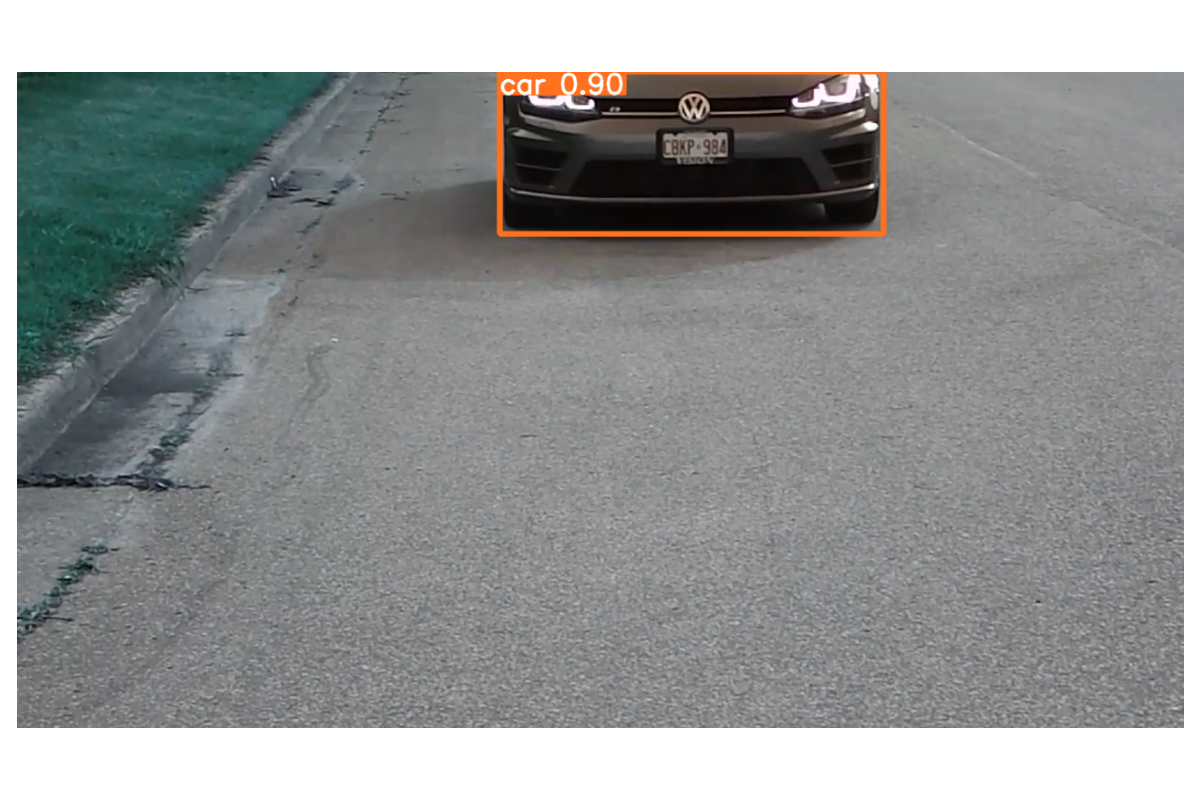

In [305]:
display_numpy_image(yolov5_results_to_numpy(yolo_lst[20][0]))

In [257]:
most_common_license_plate_V2(alpr_lst)

'CBKP984'

In [293]:
#Pass the data into a temporary data frame

In [294]:
#Create reconstruction of the images to see how model looks
complete_vid = []
for i in range(len(yolo_lst)):
    complete_vid.append(yolov5_results_to_numpy(yolo_lst[i][0]))

In [301]:
#Save all the images to a video
image_list = complete_vid 
output_video_path = 'C:\\Users\\jacob\\Desktop\\Projects\\ANPR_Camera\\Data\\Test.mp4'
create_video(image_list, output_video_path)

In [ ]:
#Next steps mostly relate to database design and implementation

#What new features need to be added? 
#Detection start and stop
#Conneting licese plate to that interval 

In [ ]:
#What data is needed in the database? 

#The actual detection video
#The detection type (Car, person, etc)
#The predicted license plate
#Can add more later as we increase UI capabilities

In [303]:
#Right now each frame is stored in a list

In [ ]:
#Next pass in video stream to see how it will handle that 
#If it can handle live stream relativly well then can focus on how output should look like for user with analysis
#Then push all this into database
